In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
print("Start of the question 2.2")

train = pd.read_csv("bbcsports_train.csv")
test  = pd.read_csv("bbcsports_val.csv")

feature_train, label_train = train.iloc[:, :-1], train.iloc[:, [-1]]
feature_test, label_test = test.iloc[:, :-1], test.iloc[:, [-1]]

label_test = label_test.values.tolist()


#defining labels
class0 = train.loc[train['class_label'] == 0]
class1 = train.loc[train['class_label'] == 1]
class2 = train.loc[train['class_label'] == 2]
class3 = train.loc[train['class_label'] == 3]
class4 = train.loc[train['class_label'] == 4]

#count each class 
class0_count = len(class0.index)
class1_count = len(class1.index)
class2_count = len(class2.index)
class3_count = len(class3.index)
class4_count = len(class4.index) 

#total_count = # of train set (Variable N)
total_count = len(train)

#calculation of the first part of the equation ( estimator y^part)
pi_class0 = np.log2(class0_count/total_count)
pi_class1 = np.log2(class1_count/total_count)
pi_class2 = np.log2(class2_count/total_count)
pi_class3 = np.log2(class3_count/total_count)
pi_class4 = np.log2(class4_count/total_count)


# calculations for theta.
theta_class0 = pd.DataFrame()
theta_class1 = pd.DataFrame()
theta_class2 = pd.DataFrame()
theta_class3 = pd.DataFrame()
theta_class4 = pd.DataFrame()

theta_class0['total'] = class0.iloc[:, :-1].sum(axis = 0) 
theta_class1["total"] = class1.iloc[:, :-1].sum(axis = 0) 
theta_class2["total"] = class2.iloc[:, :-1].sum(axis = 0) 
theta_class3["total"] = class3.iloc[:, :-1].sum(axis = 0) 
theta_class4["total"] = class4.iloc[:, :-1].sum(axis = 0) 

total_theta_class0 = theta_class0.sum(axis = 0) 
total_theta_class1 = theta_class1.sum(axis = 0) 
total_theta_class2 = theta_class2.sum(axis = 0) 
total_theta_class3 = theta_class3.sum(axis = 0) 
total_theta_class4 = theta_class4.sum(axis = 0) 

temp_class4 = []

for total in theta_class4['total']:
    temp_class4.append(np.log2(total  / total_theta_class4['total']) if total > 0 else -np.inf)
theta_class4['log'] = temp_class4

temp_class3 = []
for total in theta_class3['total']:
    temp_class3.append(np.log2(total / total_theta_class3['total']) if total > 0 else -np.inf)
theta_class3['log'] = temp_class3

temp_class2 = []
for total in theta_class2['total']:
    temp_class2.append(np.log2(total / total_theta_class2['total']) if total > 0 else -np.inf)
theta_class2['log'] = temp_class2


temp_class1 = []
for total in theta_class1['total']:
    temp_class1.append(np.log2(total / total_theta_class1['total']) if total > 0 else -np.inf)
theta_class1['log'] = temp_class1

temp_class0 = []
for total in theta_class0['total']:
    temp_class0.append(np.log2(total / total_theta_class0['total']) if total > 0 else -np.inf)
theta_class0['log'] = temp_class0


theta_class0_list = theta_class0['log'].tolist()
theta_class1_list = theta_class1['log'].tolist()
theta_class2_list = theta_class2['log'].tolist()
theta_class3_list = theta_class3['log'].tolist()
theta_class4_list = theta_class4['log'].tolist()

#-------------------------------------------------------------------------------------

def MultinomialNaiveBayes(i):
    
    twji = feature_test[i:i+1]
    
    test_class0 = twji * theta_class0_list
    test_class1 = twji * theta_class1_list
    test_class2 = twji * theta_class2_list
    test_class3 = twji * theta_class3_list
    test_class4 = twji * theta_class4_list
    
    test_class0 = test_class0.sum(axis=1)
    test_class1 = test_class1.sum(axis=1)
    test_class2 = test_class2.sum(axis=1)
    test_class3 = test_class3.sum(axis=1)
    test_class4 = test_class4.sum(axis=1)
    
    test_class0 = test_class0.apply(lambda x: x + pi_class0)
    test_class1 = test_class1.apply(lambda x: x + pi_class1)
    test_class2 = test_class2.apply(lambda x: x + pi_class2)
    test_class3 = test_class3.apply(lambda x: x + pi_class3)
    test_class4 = test_class4.apply(lambda x: x + pi_class4)
    
    prediction = np.argmax([test_class0, test_class1, test_class2, test_class3, test_class4])
    return prediction

list_prediction=[] # list initiated to store predictions.
for i in range(len(test)):
    list_prediction.append(MultinomialNaiveBayes(i))
    
test['Prediction'] = list_prediction

AA = len(test[(test['class_label']==0)&(test['Prediction']==0)])
AB = len(test[(test['class_label']==1)&(test['Prediction']==0)])
AC = len(test[(test['class_label']==2)&(test['Prediction']==0)])
AD = len(test[(test['class_label']==3)&(test['Prediction']==0)])
AF = len(test[(test['class_label']==4)&(test['Prediction']==0)])

BA = len(test[(test['class_label']==0)&(test['Prediction']==1)])
BB = len(test[(test['class_label']==1)&(test['Prediction']==1)])
BC = len(test[(test['class_label']==2)&(test['Prediction']==1)])
BD = len(test[(test['class_label']==3)&(test['Prediction']==1)])
BF = len(test[(test['class_label']==4)&(test['Prediction']==1)])

CA = len(test[(test['class_label']==0)&(test['Prediction']==2)])
CB = len(test[(test['class_label']==1)&(test['Prediction']==2)])
CC = len(test[(test['class_label']==2)&(test['Prediction']==2)])
CD = len(test[(test['class_label']==3)&(test['Prediction']==2)])
CF = len(test[(test['class_label']==4)&(test['Prediction']==2)])

DA = len(test[(test['class_label']==0)&(test['Prediction']==3)])
DB = len(test[(test['class_label']==1)&(test['Prediction']==3)])
DC = len(test[(test['class_label']==2)&(test['Prediction']==3)])
DD = len(test[(test['class_label']==3)&(test['Prediction']==3)])
DF = len(test[(test['class_label']==4)&(test['Prediction']==3)])

EA = len(test[(test['class_label']==0)&(test['Prediction']==4)])
EB = len(test[(test['class_label']==1)&(test['Prediction']==4)])
EC = len(test[(test['class_label']==2)&(test['Prediction']==4)])
ED = len(test[(test['class_label']==3)&(test['Prediction']==4)])
EE = len(test[(test['class_label']==4)&(test['Prediction']==4)])


confusion_matrix = pd.DataFrame(np.array([[AA,AB,AC,AD,AF],
                                          [BA,BB,BC,BD,BF],
                                          [CA,CB,CC,CD,CF],
                                          [DA,DB,DC,DD,DF],
                                          [EA,EB,EC,ED,EE]]))

#In this case we should submit different TP TN FP FN values for each class
# since every of them has different calculation approach.
print("Confusion matrix:")
print(confusion_matrix)

Accuracy = ((AA+BB+CC+DD+EE)/ len(test))*100

print(f"Accuracy of MLE Estimation : {Accuracy:.4f}%")

print("End of the question 2.2")

print("Start of the question 2.3")


#In question 2.3, we changed the calculations a bit.
# Alpha is set to 1. Also word count is 4163 which is given in question.

V=4163
A = 1

theta_class0['total'] = class0.iloc[:, :-1].sum(axis = 0) + A
theta_class1["total"] = class1.iloc[:, :-1].sum(axis = 0) + A
theta_class2["total"] = class2.iloc[:, :-1].sum(axis = 0) + A
theta_class3["total"] = class3.iloc[:, :-1].sum(axis = 0) + A
theta_class4["total"] = class4.iloc[:, :-1].sum(axis = 0) + A

total_theta_class0 = theta_class0.sum(axis = 0) + A * V
total_theta_class1 = theta_class1.sum(axis = 0) + A * V
total_theta_class2 = theta_class2.sum(axis = 0) + A * V
total_theta_class3 = theta_class3.sum(axis = 0) + A * V
total_theta_class4 = theta_class4.sum(axis = 0) + A * V

temp_class4 = []

for total in theta_class4['total']:
    temp_class4.append(np.log2(total  / total_theta_class4['total']) if total > 0 else -np.inf)
theta_class4['log'] = temp_class4

temp_class3 = []
for total in theta_class3['total']:
    temp_class3.append(np.log2(total / total_theta_class3['total']) if total > 0 else -np.inf)
theta_class3['log'] = temp_class3

temp_class2 = []
for total in theta_class2['total']:
    temp_class2.append(np.log2(total / total_theta_class2['total']) if total > 0 else -np.inf)
theta_class2['log'] = temp_class2


temp_class1 = []
for total in theta_class1['total']:
    temp_class1.append(np.log2(total / total_theta_class1['total']) if total > 0 else -np.inf)
theta_class1['log'] = temp_class1

temp_class0 = []
for total in theta_class0['total']:
    temp_class0.append(np.log2(total / total_theta_class0['total']) if total > 0 else -np.inf)
theta_class0['log'] = temp_class0


theta_class0_list = theta_class0['log'].tolist()
theta_class1_list = theta_class1['log'].tolist()
theta_class2_list = theta_class2['log'].tolist()
theta_class3_list = theta_class3['log'].tolist()
theta_class4_list = theta_class4['log'].tolist()

#We define MultinomialNaiveBayes(i) before. So we can use it for drichlet prior.

list_prediction=[] 
for i in range(len(test)):
    list_prediction.append(MultinomialNaiveBayes(i))
    
test['Dirichlet_Prediction'] = list_prediction

AA2 = len(test[(test['class_label']==0)&(test['Dirichlet_Prediction']==0)])
AB2 = len(test[(test['class_label']==1)&(test['Dirichlet_Prediction']==0)])
AC2 = len(test[(test['class_label']==2)&(test['Dirichlet_Prediction']==0)])
AD2 = len(test[(test['class_label']==3)&(test['Dirichlet_Prediction']==0)])
AF2 = len(test[(test['class_label']==4)&(test['Dirichlet_Prediction']==0)])

BA2 = len(test[(test['class_label']==0)&(test['Dirichlet_Prediction']==1)])
BB2 = len(test[(test['class_label']==1)&(test['Dirichlet_Prediction']==1)])
BC2 = len(test[(test['class_label']==2)&(test['Dirichlet_Prediction']==1)])
BD2 = len(test[(test['class_label']==3)&(test['Dirichlet_Prediction']==1)])
BF2 = len(test[(test['class_label']==4)&(test['Dirichlet_Prediction']==1)])

CA2 = len(test[(test['class_label']==0)&(test['Dirichlet_Prediction']==2)])
CB2 = len(test[(test['class_label']==1)&(test['Dirichlet_Prediction']==2)])
CC2 = len(test[(test['class_label']==2)&(test['Dirichlet_Prediction']==2)])
CD2 = len(test[(test['class_label']==3)&(test['Dirichlet_Prediction']==2)])
CF2 = len(test[(test['class_label']==4)&(test['Dirichlet_Prediction']==2)])

DA2 = len(test[(test['class_label']==0)&(test['Dirichlet_Prediction']==3)])
DB2 = len(test[(test['class_label']==1)&(test['Dirichlet_Prediction']==3)])
DC2 = len(test[(test['class_label']==2)&(test['Dirichlet_Prediction']==3)])
DD2 = len(test[(test['class_label']==3)&(test['Dirichlet_Prediction']==3)])
DF2 = len(test[(test['class_label']==4)&(test['Dirichlet_Prediction']==3)])

EA2 = len(test[(test['class_label']==0)&(test['Dirichlet_Prediction']==4)])
EB2 = len(test[(test['class_label']==1)&(test['Dirichlet_Prediction']==4)])
EC2 = len(test[(test['class_label']==2)&(test['Dirichlet_Prediction']==4)])
ED2 = len(test[(test['class_label']==3)&(test['Dirichlet_Prediction']==4)])
EE2 = len(test[(test['class_label']==4)&(test['Dirichlet_Prediction']==4)])


confusion_matrix2 = pd.DataFrame(np.array([[AA2,AB2,AC2,AD2,AF2],
                                           [BA2,BB2,BC2,BD2,BF2],
                                           [CA2,CB2,CC2,CD2,CF2],
                                           [DA2,DB2,DC2,DD2,DF2],
                                           [EA2,EB2,EC2,ED2,EE2]]))

print("Confusion matrix 2:")
print(confusion_matrix2)
Accuracy = ((AA2+BB2+CC2+DD2+EE2)/ len(test))*100

print(f"Accuracy of MAP Estimation with drichlet prior : {Accuracy:.4f}%")

print("End of the question 2.3")





Start of the question 2.2
Confusion matrix:
    0   1   2   3   4
0  24  34  54  31  21
1   0   4   0   0   0
2   0   0  13   0   0
3   0   0   0   2   0
4   0   0   0   0   2
Accuracy of MLE Estimation : 24.3243%
End of the question 2.2
Start of the question 2.3
Confusion matrix 2:
    0   1   2   3   4
0  24   0   0   0   1
1   0  35   0   0   0
2   0   2  66   0   0
3   0   1   1  33   0
4   0   0   0   0  22
Accuracy of MAP Estimation with drichlet prior : 97.2973%
End of the question 2.3


[77, 86, 198, 114, 77]
552


Text(0.5, 1.0, 'Distribution of classes over Train Dataset')

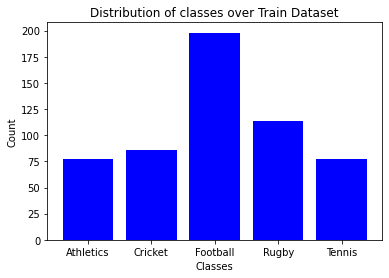

In [13]:
#PLOTS FOR THE QUESTION 2.1 (EXTRA!)

# definition of the variables.
x0 = class0_count
x1 = class1_count
x2 = class2_count
x3 = class3_count
x4 = class4_count

classes = ["Athletics", "Cricket", "Football", "Rugby", "Tennis"]
counts = [x0, x1, x2, x3, x4]
print(counts)
ypos = np.arange(len(classes))
ypos

plt.bar(classes, counts, color = "blue" )

print(sum(counts))

plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Distribution of classes over Train Dataset")

[24, 38, 67, 33, 23]
185


Text(0.5, 1.0, 'Distribution of classes over Validation Dataset')

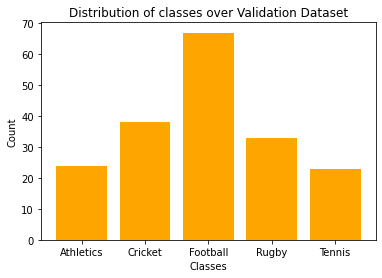

In [14]:
#PLOTS FOR THE QUESTION 2.1 (EXTRA!)

# definition of the variables.
vclass0 = test.loc[test['class_label'] == 0]
vclass1 = test.loc[test['class_label'] == 1]
vclass2 = test.loc[test['class_label'] == 2]
vclass3 = test.loc[test['class_label'] == 3]
vclass4 = test.loc[test['class_label'] == 4]

vclass0_count = len(vclass0.index)
vclass1_count = len(vclass1.index)
vclass2_count = len(vclass2.index)
vclass3_count = len(vclass3.index)
vclass4_count = len(vclass4.index) 

v0 = vclass0_count
v1 = vclass1_count
v2 = vclass2_count
v3 = vclass3_count
v4 = vclass4_count

counts_2 =[v0, v1, v2, v3, v4]
print(counts_2)
print(sum(counts_2))

classes = ["Athletics", "Cricket", "Football", "Rugby", "Tennis"]

plt.bar(classes, counts_2, color = "orange" )

plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Distribution of classes over Validation Dataset")